# Project on RFM Dataset using Logistic Regression

In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from pandasql import sqldf
from datetime import datetime

In [2]:
df= pd.read_csv(r"\\\\RFM_Data.csv") # reading the dataset

In [3]:
df.head()

,RetailStore,CustomerID,TransactionID,Transaction Time,ProductID,Cost
0,1,1001,1ID10051,1/1/2011 9:18,1,144.75
1,2,1002,2ID10052,1/1/2011 11:56,2,97.25
2,2,1002,2ID10052,1/1/2011 11:56,3,47.25
3,2,1002,2ID10052,1/1/2011 11:56,4,197.25
4,3,1003,3ID10053,1/1/2011 12:38,5,216.00


In [4]:
df.isnull().sum() # lucky enough that we are not havinh null values

RetailStore         0
CustomerID          0
TransactionID       0
Transaction Time    0
ProductID           0
Cost                0
dtype: int64

In [5]:
df.apply(lambda x : len(x.unique())) # by using the lambda function we were able to unique values of the attributes

RetailStore             5
CustomerID          10372
TransactionID       21767
Transaction Time    20823
ProductID              89
Cost                  423
dtype: int64

In [6]:
df.dtypes # datatypes about the attribute of the dataset

RetailStore           int64
CustomerID            int64
TransactionID        object
Transaction Time     object
ProductID             int64
Cost                float64
dtype: object

In [7]:
df.head()

,RetailStore,CustomerID,TransactionID,Transaction Time,ProductID,Cost
0,1,1001,1ID10051,1/1/2011 9:18,1,144.75
1,2,1002,2ID10052,1/1/2011 11:56,2,97.25
2,2,1002,2ID10052,1/1/2011 11:56,3,47.25
3,2,1002,2ID10052,1/1/2011 11:56,4,197.25
4,3,1003,3ID10053,1/1/2011 12:38,5,216.00


In [8]:
df['Date'] = pd.to_datetime(df['Transaction Time'], errors='coerce') # getting another attribute called date in same format

In [9]:
df.Date.head(3)

0   2011-01-01 09:18:00
1   2011-01-01 11:56:00
2   2011-01-01 11:56:00
Name: Date, dtype: datetime64[ns]

In [10]:
df['Dates']=pd.to_datetime(df['Date'].dt.strftime('%d%m%y')) # for easy computation we fetched the dates from dates attribute

In [11]:
df.tail()

,RetailStore,CustomerID,TransactionID,Transaction Time,ProductID,Cost,Date,Dates
56868,2,10272,2ID31814,24-03-2012 13:21,25,207.25,2012-03-24 13:21:00,2012-03-24
56869,5,11329,5ID31815,24-03-2012 13:04,26,274.50,2012-03-24 13:04:00,2012-03-24
56870,1,10469,1ID31816,24-03-2012 12:04,8,207.00,2012-03-24 12:04:00,2012-03-24
56871,5,11372,5ID31817,24-03-2012 14:31,31,1074.75,2012-03-24 14:31:00,2012-03-24
56872,5,11372,5ID31817,24-03-2012 14:31,31,1074.75,2012-03-24 14:31:00,2012-03-24


In [12]:
max(df['Dates'])

Timestamp('2012-12-31 00:00:00')

In [13]:
min(df['Dates'])

Timestamp('2011-01-01 00:00:00')

In [14]:
df.describe() # going for the description about the dataset

,RetailStore,CustomerID,ProductID,Cost
count,56873.000000,56873.000000,56873.000000,56873.000000
mean,3.146502,5644.545109,22.496193,182.641398
std,1.397261,2905.664431,16.440274,116.829096
min,1.000000,1001.000000,1.000000,0.000000
25%,2.000000,3056.000000,9.000000,147.250000
50%,3.000000,5539.000000,20.000000,197.250000
75%,4.000000,7995.000000,32.000000,209.500000
max,5.000000,11372.000000,89.000000,1812.250000


In [15]:
df.loc[(df['Cost']==0)] # two records have cost zero

,RetailStore,CustomerID,TransactionID,Transaction Time,ProductID,Cost,Date,Dates
15707,2,1222,2ID16231,12/10/2011 13:53,54,0.0,2011-12-10 13:53:00,2011-10-12
41953,1,9070,1ID26246,1/10/2012 9:33,54,0.0,2012-01-10 09:33:00,2012-10-01


In [16]:
rfm=df.loc[(df['Cost']==0)]

In [17]:
df.drop(rfm.index, axis=0,inplace=True)

In [18]:
# df.loc[(df['ProductID']==54) & (df['RetailStore']==1) ]

In [19]:
# df.loc[(df['ProductID']==54) & (df['RetailStore']==2) ]

In [20]:
df.head()

,RetailStore,CustomerID,TransactionID,Transaction Time,ProductID,Cost,Date,Dates
0,1,1001,1ID10051,1/1/2011 9:18,1,144.75,2011-01-01 09:18:00,2011-01-01
1,2,1002,2ID10052,1/1/2011 11:56,2,97.25,2011-01-01 11:56:00,2011-01-01
2,2,1002,2ID10052,1/1/2011 11:56,3,47.25,2011-01-01 11:56:00,2011-01-01
3,2,1002,2ID10052,1/1/2011 11:56,4,197.25,2011-01-01 11:56:00,2011-01-01
4,3,1003,3ID10053,1/1/2011 12:38,5,216.00,2011-01-01 12:38:00,2011-01-01


In [21]:
df.shape # there are around 56k transactions done in the retail mart in 2011 and 2012

(56871, 8)

In [22]:
print('Entres duplicate: {}'.format(df.duplicated().sum())) #5266 duplicate records

Entres duplicate: 5266


In [23]:
df.drop_duplicates(inplace = True) #deleting thr duplicate entries

In [24]:
print('Entres duplicate: {}'.format(df.duplicated().sum()))

Entres duplicate: 0


In [25]:
#df.drop(df,axis=1,inplace=True,columns='Transaction Time')
del df['Transaction Time']
del df['Date']

In [26]:
dependent=df[df['Dates'] >= "2012-10-01"]

In [27]:
independent=df[df['Dates']<"2012-10-01"]

In [28]:
dependent.shape

(7280, 6)

In [29]:
independent.shape

(44254, 6)

In [30]:
rfm=independent.groupby('CustomerID').agg({'Dates': lambda dates: (independent.Dates.max() - dates.max()).days, 'TransactionID': lambda num: len(num), 'Cost': lambda price: price.sum()})
# creating new columns from the existing columns

In [31]:
rfm.columns

Index(['Dates', 'TransactionID', 'Cost'], dtype='object')

In [32]:
rfm.columns=['recency','frequency','monetary']

In [33]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
1001,638,1,144.75
1002,184,16,2162.75
1003,638,2,353.25
1004,196,13,2673.50
1005,638,1,147.25


In [34]:
rfm.describe()

,recency,frequency,monetary
count,9304.000000,9304.000000,9304.000000
mean,259.594475,4.756449,859.542267
std,177.249889,7.089439,1254.514064
min,0.000000,1.000000,32.250000
25%,116.000000,2.000000,314.500000
50%,226.000000,3.000000,520.250000
75%,397.000000,5.000000,925.812500
max,638.000000,206.000000,31196.250000


In [35]:
rfm['6months']=pd.pivot_table(independent[independent['Dates'] >= "2012-04-01"], index = 'CustomerID',  aggfunc = {'TransactionID':'count'})

In [36]:
rfm.head(10)

,recency,frequency,monetary,6months
CustomerID,,,,
1001,638,1,144.75,NaN
1002,184,16,2162.75,NaN
1003,638,2,353.25,NaN
1004,196,13,2673.50,NaN
1005,638,1,147.25,NaN
1006,638,5,838.00,NaN
1007,635,2,432.00,NaN
1008,638,2,344.50,NaN
1009,638,2,394.50,NaN


In [37]:
rfm['1year']=pd.pivot_table(independent[independent['Dates'] >= "2011-09-01"], index = 'CustomerID',  aggfunc = {'TransactionID':'count'})

In [38]:
rfm['1.5year']=pd.pivot_table(independent[independent['Dates'] >= "2011-04-01"], index = 'CustomerID',  aggfunc = {'TransactionID':'count'})

In [39]:
rfm.head(10)

,recency,frequency,monetary,6months,1year,1.5year
CustomerID,,,,,,
1001,638,1,144.75,NaN,NaN,NaN
1002,184,16,2162.75,NaN,7.0,7.0
1003,638,2,353.25,NaN,NaN,NaN
1004,196,13,2673.50,NaN,5.0,7.0
1005,638,1,147.25,NaN,NaN,NaN
1006,638,5,838.00,NaN,NaN,NaN
1007,635,2,432.00,NaN,NaN,NaN
1008,638,2,344.50,NaN,NaN,NaN
1009,638,2,394.50,NaN,NaN,NaN


In [40]:
rfm.head(10)

,recency,frequency,monetary,6months,1year,1.5year
CustomerID,,,,,,
1001,638,1,144.75,NaN,NaN,NaN
1002,184,16,2162.75,NaN,7.0,7.0
1003,638,2,353.25,NaN,NaN,NaN
1004,196,13,2673.50,NaN,5.0,7.0
1005,638,1,147.25,NaN,NaN,NaN
1006,638,5,838.00,NaN,NaN,NaN
1007,635,2,432.00,NaN,NaN,NaN
1008,638,2,344.50,NaN,NaN,NaN
1009,638,2,394.50,NaN,NaN,NaN


In [41]:
rfm['6monthscost']=pd.pivot_table(independent[independent['Dates'] >= "2012-04-01"], index = 'CustomerID',  aggfunc = {'Cost':'sum'})

In [42]:
rfm['1yearcost']=pd.pivot_table(independent[independent['Dates'] >= "2011-09-01"], index = 'CustomerID',  aggfunc = {'Cost':'sum'})

In [43]:
rfm['1.5yearcost']=pd.pivot_table(independent[independent['Dates'] >= "2011-04-01"], index = 'CustomerID',  aggfunc = {'Cost':'sum'})

In [44]:
rfm.head(10)

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost
CustomerID,,,,,,,,,
1001,638,1,144.75,NaN,NaN,NaN,NaN,NaN,NaN
1002,184,16,2162.75,NaN,7.0,7.0,NaN,1100.25,1100.25
1003,638,2,353.25,NaN,NaN,NaN,NaN,NaN,NaN
1004,196,13,2673.50,NaN,5.0,7.0,NaN,1035.00,1429.00
1005,638,1,147.25,NaN,NaN,NaN,NaN,NaN,NaN
1006,638,5,838.00,NaN,NaN,NaN,NaN,NaN,NaN
1007,635,2,432.00,NaN,NaN,NaN,NaN,NaN,NaN
1008,638,2,344.50,NaN,NaN,NaN,NaN,NaN,NaN
1009,638,2,394.50,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
rfm.replace(np.NAN,0,inplace=True) # replacing the null values with 0

In [46]:
independent.columns

Index(['RetailStore', 'CustomerID', 'TransactionID', 'ProductID', 'Cost',
       'Dates'],
      dtype='object')

In [47]:
rfm.head()

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost
CustomerID,,,,,,,,,
1001,638,1,144.75,0.0,0.0,0.0,0.0,0.00,0.00
1002,184,16,2162.75,0.0,7.0,7.0,0.0,1100.25,1100.25
1003,638,2,353.25,0.0,0.0,0.0,0.0,0.00,0.00
1004,196,13,2673.50,0.0,5.0,7.0,0.0,1035.00,1429.00
1005,638,1,147.25,0.0,0.0,0.0,0.0,0.00,0.00


In [48]:
rfm['target']=rfm.index.isin(dependent['CustomerID']) # checking customer id in dependent dataset

In [49]:
rfm.head()

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost,target
CustomerID,,,,,,,,,,
1001,638,1,144.75,0.0,0.0,0.0,0.0,0.00,0.00,False
1002,184,16,2162.75,0.0,7.0,7.0,0.0,1100.25,1100.25,False
1003,638,2,353.25,0.0,0.0,0.0,0.0,0.00,0.00,False
1004,196,13,2673.50,0.0,5.0,7.0,0.0,1035.00,1429.00,False
1005,638,1,147.25,0.0,0.0,0.0,0.0,0.00,0.00,False


In [50]:
rfm.target.value_counts()

False    8377
True      927
Name: target, dtype: int64

In [51]:
independent.shape

(44254, 6)

In [52]:
rfm.apply(lambda x : len(x.unique())) 

recency         635
frequency        71
monetary       3462
6months          49
1year            65
1.5year          70
6monthscost    1765
1yearcost      2865
1.5yearcost    3277
target            2
dtype: int64

In [53]:
rfm.dtypes

recency          int64
frequency        int64
monetary       float64
6months        float64
1year          float64
1.5year        float64
6monthscost    float64
1yearcost      float64
1.5yearcost    float64
target            bool
dtype: object

In [54]:
rfm.head(10)

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost,target
CustomerID,,,,,,,,,,
1001,638,1,144.75,0.0,0.0,0.0,0.0,0.00,0.00,False
1002,184,16,2162.75,0.0,7.0,7.0,0.0,1100.25,1100.25,False
1003,638,2,353.25,0.0,0.0,0.0,0.0,0.00,0.00,False
1004,196,13,2673.50,0.0,5.0,7.0,0.0,1035.00,1429.00,False
1005,638,1,147.25,0.0,0.0,0.0,0.0,0.00,0.00,False
1006,638,5,838.00,0.0,0.0,0.0,0.0,0.00,0.00,False
1007,635,2,432.00,0.0,0.0,0.0,0.0,0.00,0.00,False
1008,638,2,344.50,0.0,0.0,0.0,0.0,0.00,0.00,False
1009,638,2,394.50,0.0,0.0,0.0,0.0,0.00,0.00,False


In [55]:
rfm['target'] = (rfm['target'] ==True).astype(int)

In [56]:
rfm.target.value_counts()

0    8377
1     927
Name: target, dtype: int64

## 1.univariate analysis

In [57]:
rfm.head()

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost,target
CustomerID,,,,,,,,,,
1001,638,1,144.75,0.0,0.0,0.0,0.0,0.00,0.00,0
1002,184,16,2162.75,0.0,7.0,7.0,0.0,1100.25,1100.25,0
1003,638,2,353.25,0.0,0.0,0.0,0.0,0.00,0.00,0
1004,196,13,2673.50,0.0,5.0,7.0,0.0,1035.00,1429.00,0
1005,638,1,147.25,0.0,0.0,0.0,0.0,0.00,0.00,0


In [58]:
rfm.describe()

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost,target
count,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000
mean,259.594475,4.756449,859.542267,1.632094,3.462919,4.323409,296.470712,626.227402,779.203730,0.099635
std,177.249889,7.089439,1254.514064,3.735730,5.951840,6.805081,680.465497,1055.995662,1190.084797,0.299528
min,0.000000,1.000000,32.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,2.000000,314.500000,0.000000,0.000000,1.000000,0.000000,0.000000,254.500000,0.000000
50%,226.000000,3.000000,520.250000,0.000000,2.000000,3.000000,0.000000,394.500000,478.500000,0.000000
75%,397.000000,5.000000,925.812500,2.000000,4.000000,5.000000,409.500000,730.437500,854.875000,0.000000
max,638.000000,206.000000,31196.250000,74.000000,144.000000,204.000000,13220.750000,25492.750000,27929.000000,1.000000


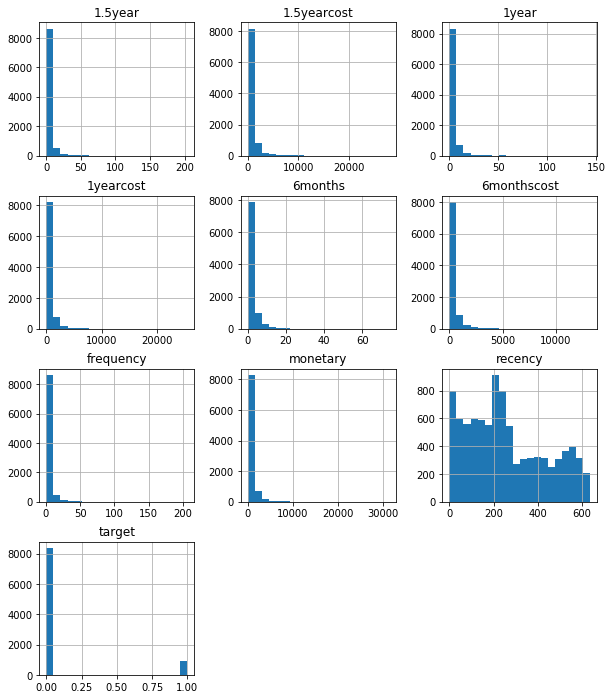

In [59]:
rfm.hist(figsize=[10,12],bins =20)
plt.show()

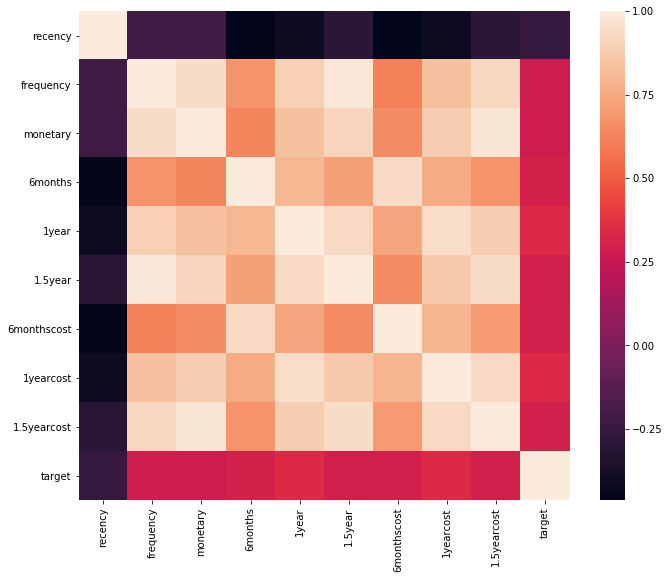

In [60]:
corr = rfm.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

## Histograms

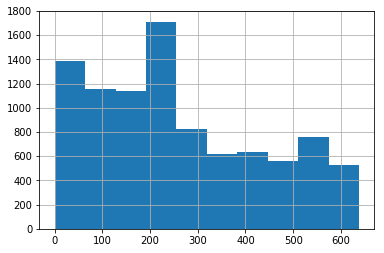

In [61]:
rfm.recency.hist() # maximum duration in doing transaction by a customer is approx 640 

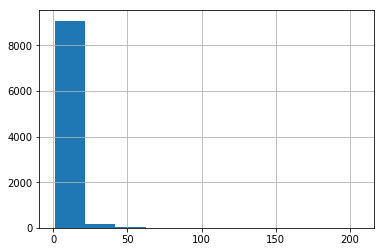

In [62]:
rfm.frequency.hist() #no of times customer visited ranges from 0 to 20

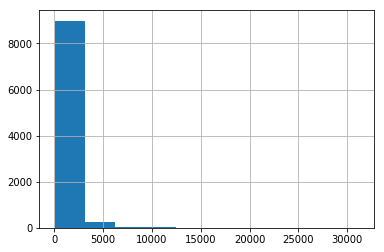

In [63]:
rfm.monetary.hist() #most of the customer spent amount btw 0 to 4000

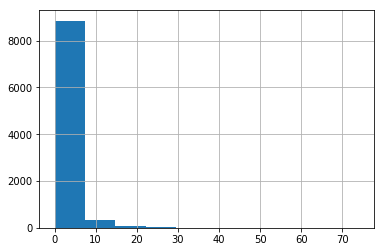

In [64]:
rfm['6months'].hist()

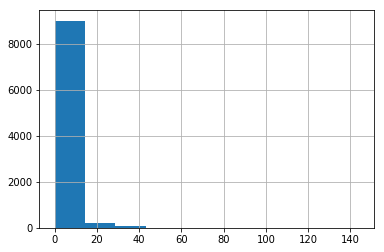

In [65]:
rfm['1year'].hist()

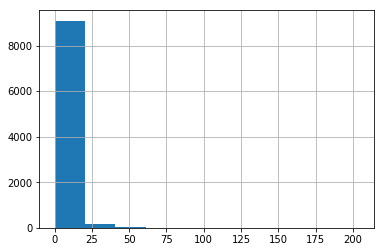

In [66]:
rfm['1.5year'].hist()

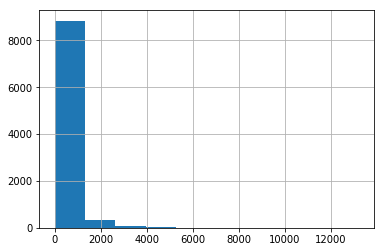

In [67]:
rfm['6monthscost'].hist()

In [68]:
rfm.columns

Index(['recency', 'frequency', 'monetary', '6months', '1year', '1.5year',
       '6monthscost', '1yearcost', '1.5yearcost', 'target'],
      dtype='object')

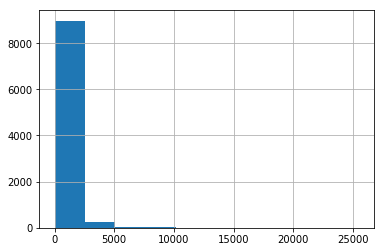

In [69]:
rfm['1yearcost'].hist()

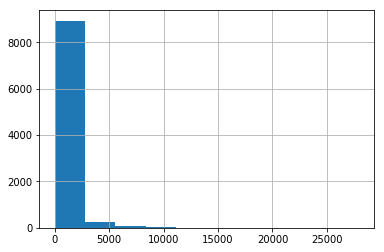

In [70]:
rfm['1.5yearcost'].hist()

## Bivariate analysis

### RECENY vs TARGET

In [71]:
import scipy.stats as stats

In [72]:
rfm.columns

Index(['recency', 'frequency', 'monetary', '6months', '1year', '1.5year',
       '6monthscost', '1yearcost', '1.5yearcost', 'target'],
      dtype='object')

In [73]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['recency'], cat2['recency'])  

Ttest_indResult(statistic=25.612109830331118, pvalue=7.271754715689656e-140)

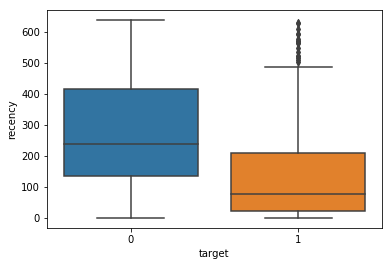

In [74]:
sns.boxplot(y="recency", x="target", data=rfm)
# We can say that less recency the probability of coming in next quarter is more

## Frequency vs  Target

In [75]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between frequecy and target

stats.ttest_ind(cat1['frequency'], cat2['frequency'])  

Ttest_indResult(statistic=-28.033410457048525, pvalue=4.446927560358421e-166)

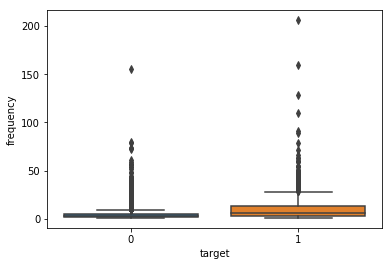

In [76]:
sns.boxplot(y="frequency", x="target", data=rfm)
# from the below graph we can inference that if the no times the customer visited in more then 
#proablity of that customer visiting 
#in next quater is more

## Monetary vs Target

In [77]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between monetary and target

stats.ttest_ind(cat1['monetary'], cat2['monetary'])  

Ttest_indResult(statistic=-27.86374156417857, pvalue=3.5511596011562e-164)

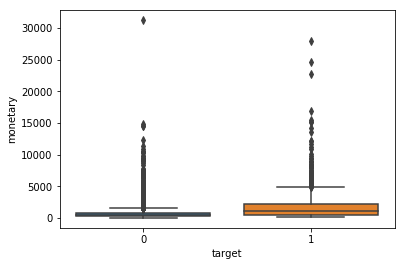

In [78]:
sns.boxplot(y="monetary", x="target", data=rfm)
# from the below graph we can inference that if the costs spent by the customer is more than 
#proablity of that customer visiting 
#in next quater is more compare with those who spent less money

## 6months vs Target

In [79]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['6months'], cat2['6months']) 

Ttest_indResult(statistic=-31.093161769748665, pvalue=5.055059122208833e-202)

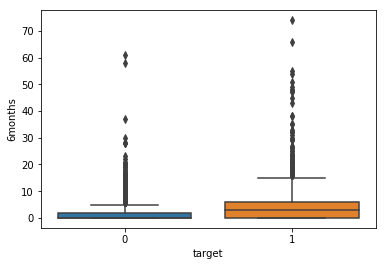

In [80]:
sns.boxplot(y="6months", x="target", data=rfm)
# no products he bought is last six months is more that proablity of them visiting in next quater is more

## 1year vs Target

In [81]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['1year'], cat2['1year']) 

Ttest_indResult(statistic=-34.91134905021819, pvalue=4.837626826674049e-251)

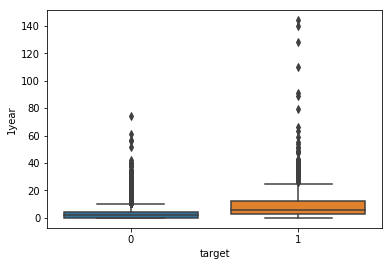

In [82]:
sns.boxplot(y="1year", x="target", data=rfm)
# no products he bought is last 1 year is more that proablity of them visiting in next quater is more

## 1.5year vs Target

In [84]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['1.5year'], cat2['1.5year']) 

Ttest_indResult(statistic=-29.982879532785184, pvalue=1.2619884976790507e-188)

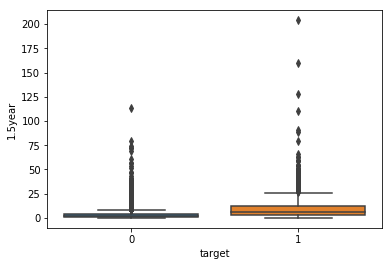

In [85]:
sns.boxplot(y="1.5year", x="target", data=rfm)
# no products he bought is last 1.5 years is more that proablity of them visiting in next quater is more

## 6monthscost vs Target

In [86]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['6monthscost'], cat2['6monthscost']) 

Ttest_indResult(statistic=-30.08745810465297, pvalue=7.180338165723836e-190)

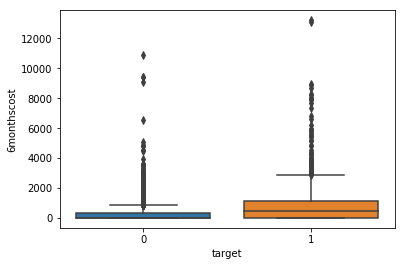

In [87]:
sns.boxplot(y="6monthscost", x="target", data=rfm)
# amount customer spent in last 6 is more that proablity of them visiting in next quater is more

## 1yearcost vs Target

In [88]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['1yearcost'], cat2['1yearcost'])

Ttest_indResult(statistic=-34.582303472566466, pvalue=1.2112404942862577e-246)

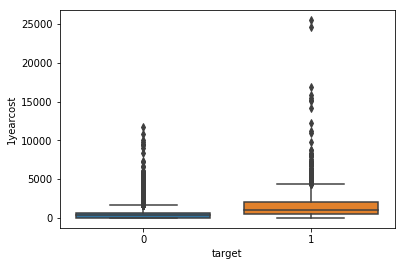

In [89]:
sns.boxplot(y="1yearcost", x="target", data=rfm)
# amount customer spent in last 1year is more that proablity of them visiting in next quater is more

## 1.5yearcost vs Target

In [90]:
cat1 = rfm[rfm['target']==0]
cat2 = rfm[rfm['target']==1]         #There is significant association between recency and target

stats.ttest_ind(cat1['1.5yearcost'], cat2['1.5yearcost'])

Ttest_indResult(statistic=-30.25714763812015, pvalue=6.73888131761238e-192)

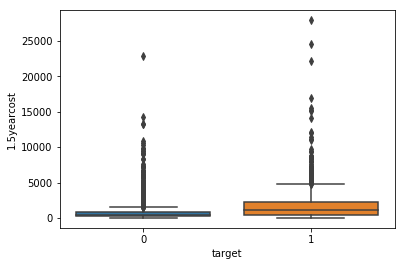

In [91]:
sns.boxplot(y="1.5yearcost", x="target", data=rfm)
# amount customer spent in last 1.5year is more that proablity of them visiting in next quater is more

In [92]:
# conclusion of bivariate anyalsis
# the dervied variable has significant effect on forecasting the customer visit in nexxt quater

# MODEL BULIDING

In [93]:
y=rfm.iloc[:,9:]
x=rfm.iloc[:,0:9]

# Spliting Train and Test Data Set

In [94]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [95]:
x_train.head()

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost
CustomerID,,,,,,,,,
3143,487,3,541.75,0.0,0.0,3.0,0.0,0.0,541.75
9079,234,6,1018.50,0.0,6.0,6.0,0.0,1018.5,1018.50
5432,262,2,402.00,0.0,2.0,2.0,0.0,402.0,402.00
1106,631,1,260.75,0.0,0.0,0.0,0.0,0.0,0.00
7986,13,6,1222.50,5.0,6.0,6.0,1003.0,1222.5,1222.50


In [96]:
x_test.head()

,recency,frequency,monetary,6months,1year,1.5year,6monthscost,1yearcost,1.5yearcost
CustomerID,,,,,,,,,
1205,623,2,284.50,0.0,0.0,0.0,0.0,0.0,0.00
7612,108,1,217.00,1.0,1.0,1.0,217.0,217.0,217.00
2073,564,3,384.25,0.0,0.0,0.0,0.0,0.0,0.00
10687,243,1,217.00,0.0,1.0,1.0,0.0,217.0,217.00
2340,548,3,541.75,0.0,0.0,3.0,0.0,0.0,541.75


In [97]:
y_train.head(2)

,target
CustomerID,
3143,0
9079,1


In [98]:
y_test.head(2)

,target
CustomerID,
1205,0
7612,0


# Logistic Regression Model
##### using statsmodel

In [99]:
import statsmodels.formula.api as sm
 
model = sm.Logit(y_train, x_train)
 
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.281061
         Iterations 8


In [100]:
print(result.summary())
result.params

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 7443
Model:                          Logit   Df Residuals:                     7434
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:                  0.1232
Time:                        21:16:13   Log-Likelihood:                -2091.9
converged:                       True   LL-Null:                       -2385.8
                                        LLR p-value:                1.018e-121
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
recency        -0.0127      0.000    -40.236      0.000      -0.013      -0.012
frequency       0.3030      0.183      1.653      0.098      -0.056       0.662
monetary       -0.0018      0.001     -1.734    

recency       -0.012675
frequency      0.303020
monetary      -0.001771
6months       -0.030106
1year          0.177743
1.5year       -0.447289
6monthscost   -0.000626
1yearcost     -0.000121
1.5yearcost    0.002300
dtype: float64

In [101]:
del rfm['6months'] # droping 6 months as p value is more that 0.05

In [102]:
del rfm['1yearcost'] #droping 1yearcost as p value is more than 0.05

In [103]:
rfm.head()

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,target
CustomerID,,,,,,,,
1001,638,1,144.75,0.0,0.0,0.0,0.00,0
1002,184,16,2162.75,7.0,7.0,0.0,1100.25,0
1003,638,2,353.25,0.0,0.0,0.0,0.00,0
1004,196,13,2673.50,5.0,7.0,0.0,1429.00,0
1005,638,1,147.25,0.0,0.0,0.0,0.00,0


In [104]:
y=rfm.iloc[:,7:]
x=rfm.iloc[:,0:7]

In [105]:
y.head()

,target
CustomerID,
1001,0
1002,0
1003,0
1004,0
1005,0


In [106]:
x.head()

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost
CustomerID,,,,,,,
1001,638,1,144.75,0.0,0.0,0.0,0.00
1002,184,16,2162.75,7.0,7.0,0.0,1100.25
1003,638,2,353.25,0.0,0.0,0.0,0.00
1004,196,13,2673.50,5.0,7.0,0.0,1429.00
1005,638,1,147.25,0.0,0.0,0.0,0.00


In [107]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [108]:
model = sm.Logit(y_train, x_train)
 
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.281096
         Iterations 8


In [109]:
print(result.summary())
result.params

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 7443
Model:                          Logit   Df Residuals:                     7436
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:                  0.1231
Time:                        21:16:14   Log-Likelihood:                -2092.2
converged:                       True   LL-Null:                       -2385.8
                                        LLR p-value:                1.341e-123
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
recency        -0.0127      0.000    -40.242      0.000      -0.013      -0.012
frequency       0.3181      0.164      1.937      0.053      -0.004       0.640
monetary       -0.0019      0.001     -2.068    

recency       -0.012675
frequency      0.318109
monetary      -0.001856
1year          0.154273
1.5year       -0.455499
6monthscost   -0.000782
1.5yearcost    0.002351
dtype: float64

# Validation of the model on TRAIN dataset

    ### 1. Confusion Matrix 

In [110]:
# Train Data
# (make class predictions for the testing set)- similarly
x_pred=result.predict(x_train)
pre=pd.DataFrame(x_pred, columns=["Prob"])
pred=pd.concat([y_train,x_train,pre], axis=1)
import numpy as np
pred["pred_outcome"]=np.where(pred.Prob >= 0.5,1,0)
pred.head()

,target,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,Prob,pred_outcome
CustomerID,,,,,,,,,,
3143,0,487,3,541.75,0.0,3.0,0.0,541.75,0.001802,0
9079,1,234,6,1018.50,6.0,6.0,0.0,1018.50,0.086197,0
5432,0,262,2,402.00,2.0,2.0,0.0,402.00,0.043594,0
1106,0,631,1,260.75,0.0,0.0,0.0,0.00,0.000285,0
7986,0,13,6,1222.50,6.0,6.0,1003.0,1222.50,0.439485,0


In [111]:
pd.crosstab(pred.target, pred.pred_outcome)

pred_outcome,0,1
target,,
0,6639,75
1,614,115


In [112]:
x_pred.head() #predicted values based on our model -( on test dataset)

CustomerID
3143    0.001802
9079    0.086197
5432    0.043594
1106    0.000285
7986    0.439485
dtype: float64

In [113]:
pre.head() # creating another dataframe as pre and giving the columns name for probablity value as 'prob'

,Prob
CustomerID,
3143,0.001802
9079,0.086197
5432,0.043594
1106,0.000285
7986,0.439485


In [114]:
#pred=pd.concat([y_train,x_train,pre], axis=1)- here creating new called datafemae called pred- 
#this contains our target and all
#all other significant avariable and new created dataframe 'pre'(which contains predicted value on our dataset)

#pred["pred_outcome"]=np.where(pred.Prob >= 0.5,1,0)
# here we are checking whether prob predicted is greater than 0.5 r not add that to new column called 'pred_outcome'
pred.head()

,target,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,Prob,pred_outcome
CustomerID,,,,,,,,,,
3143,0,487,3,541.75,0.0,3.0,0.0,541.75,0.001802,0
9079,1,234,6,1018.50,6.0,6.0,0.0,1018.50,0.086197,0
5432,0,262,2,402.00,2.0,2.0,0.0,402.00,0.043594,0
1106,0,631,1,260.75,0.0,0.0,0.0,0.00,0.000285,0
7986,0,13,6,1222.50,6.0,6.0,1003.0,1222.50,0.439485,0


In [115]:
pd.crosstab(pred.target, pred.pred_outcome)

pred_outcome,0,1
target,,
0,6639,75
1,614,115


In [116]:
#sensivity
115/(614+115)

0.15775034293552812

In [117]:
#sepcificity
6639/(6639+75)

0.9888293118856122

In [118]:
(6639+115)/(6639+75+614+115)

0.9074297998119037

# Logistic regression Model
###### using sklearn

In [119]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\BrainTree\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BrainTree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## 1.confusion matrix

In [120]:
y_pred_class_train = logreg.predict(x_train)

In [121]:
ct=pd.crosstab(y_train['target'],y_pred_class_train)
print(ct)

col_0      0   1
target          
0       6667  47
1        642  87


In [122]:
y_pred_class_train

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
#sensivity
87/(87+642)

0.11934156378600823

In [124]:
#specificity
6667/(6667+47)

0.9929997021149836

In [125]:
#Accuracy
(87+6667)/(6667+87+642+47)

0.9074297998119037

In [126]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(x_train)[0:10, :]

array([[0.99086165, 0.00913835],
       [0.90601346, 0.09398654],
       [0.94821356, 0.05178644],
       [0.99585812, 0.00414188],
       [0.75077555, 0.24922445],
       [0.94353127, 0.05646873],
       [0.98369436, 0.01630564],
       [0.82570147, 0.17429853],
       [0.92926143, 0.07073857],
       [0.91510842, 0.08489158]])

In [127]:
# store the predicted probabilities for class 1
y_pred_prob_train = logreg.predict_proba(x_train)[:, 1]

In [128]:
y_pred_prob_train

array([0.00913835, 0.09398654, 0.05178644, ..., 0.16318415, 0.07533464,
       0.19344846])

# 2. ROC curve

### ROC curve is ploting between Sensitivity and 1-Specificity

0.7977207505721722


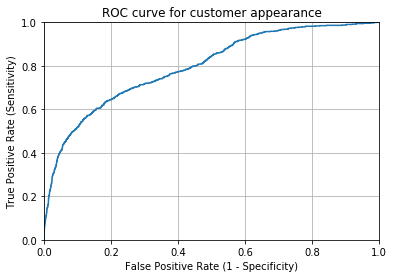

In [129]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train['target'], y_pred_prob_train)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for customer appearance')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


print(metrics.roc_auc_score(y_train['target'], y_pred_prob_train))



# KS Statistics

In [130]:
X_train_Score=logreg.predict_proba(x_train)
X_train_Score=pd.DataFrame(X_train_Score)
X_train_Score.columns = ['pred0', 'pred1']

In [131]:
X_train_Score.head(2)

,pred0,pred1
0,0.990862,0.009138
1,0.906013,0.093987


In [132]:
X_train_Score1 = pd.concat([x_train.reset_index(drop=True),
                           X_train_Score,pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

print (x_train.shape)
print (y_train.shape)
print (X_train_Score.shape)
print (X_train_Score1.shape)

(7443, 7)
(7443, 1)
(7443, 2)
(7443, 10)


In [133]:
X_train_Score1.head(2)

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,pred0,pred1,target
0,487,3,541.75,0.0,3.0,0.0,541.75,0.990862,0.009138,0
1,234,6,1018.50,6.0,6.0,0.0,1018.50,0.906013,0.093987,1


In [134]:
X_train_Score1['decile'] = pd.qcut(X_train_Score1.pred1, 10, labels=list(range(10,0,-1)))
X_train_Score1.head(10)

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,pred0,pred1,target,decile
0,487,3,541.75,0.0,3.0,0.00,541.75,0.990862,0.009138,0,9
1,234,6,1018.50,6.0,6.0,0.00,1018.50,0.906013,0.093987,1,4
2,262,2,402.00,2.0,2.0,0.00,402.00,0.948214,0.051786,0,7
3,631,1,260.75,0.0,0.0,0.00,0.00,0.995858,0.004142,0,10
4,13,6,1222.50,6.0,6.0,1003.00,1222.50,0.750776,0.249224,0,1
5,228,1,274.50,1.0,1.0,0.00,274.50,0.943531,0.056469,0,6
6,398,2,354.50,0.0,2.0,0.00,354.50,0.983694,0.016306,0,8
7,37,3,693.75,3.0,3.0,693.75,693.75,0.825701,0.174299,0,2
8,177,1,204.50,1.0,1.0,204.50,204.50,0.929261,0.070739,0,5
9,144,1,219.50,1.0,1.0,219.50,219.50,0.915108,0.084892,0,5


In [135]:
grouped = X_train_Score1.groupby('decile', as_index = False)

In [136]:
import numpy as np
grouped.agg({'pred1' : [np.min, np.max]})

decile     pred1          
              amin      amax
0     10  0.000497  0.007023
1      9  0.007029  0.011518
2      8  0.011524  0.032020
3      7  0.032096  0.052847
4      6  0.052850  0.068213
5      5  0.068219  0.085580
6      4  0.085583  0.110358
7      3  0.110371  0.148034
8      2  0.148160  0.202351
9      1  0.202400  0.999998

In [137]:
agg1 = grouped.min().pred1
agg1.rename("min_score", inplace=True)
agg2 = grouped.max().pred1
agg2.rename("max_score", inplace=True)
agg3 = grouped.count().pred1
agg3.rename("total", inplace=True)


agg4 = grouped.sum().target
agg4.rename("event", inplace=True)


agg5=grouped.min().decile
agg5.rename("decile", inplace=True)

0    10
1     9
2     8
3     7
4     6
5     5
6     4
7     3
8     2
9     1
Name: decile, dtype: category
Categories (10, int64): [10 < 9 < 8 < 7 ... 4 < 3 < 2 < 1]

In [138]:
ks=pd.concat([agg1,agg2,agg3,agg4,agg5], axis=1)
ks["non_event"]=ks["total"] - ks["event"]
ks.head(10)

,min_score,max_score,total,event,decile,non_event
0,0.000497,0.007023,745,9,10,736
1,0.007029,0.011518,744,5,9,739
2,0.011524,0.032020,744,17,8,727
3,0.032096,0.052847,744,39,7,705
4,0.052850,0.068213,745,70,6,675
5,0.068219,0.085580,744,42,5,702
6,0.085583,0.110358,744,42,4,702
7,0.110371,0.148034,744,66,3,678
8,0.148160,0.202351,744,111,2,633
9,0.202400,0.999998,745,328,1,417


In [139]:
agg5 =ks.sort_values(by='decile',ascending=False)
agg5

,min_score,max_score,total,event,decile,non_event
9,0.202400,0.999998,745,328,1,417
8,0.148160,0.202351,744,111,2,633
7,0.110371,0.148034,744,66,3,678
6,0.085583,0.110358,744,42,4,702
5,0.068219,0.085580,744,42,5,702
4,0.052850,0.068213,745,70,6,675
3,0.032096,0.052847,744,39,7,705
2,0.011524,0.032020,744,17,8,727
1,0.007029,0.011518,744,5,9,739
0,0.000497,0.007023,745,9,10,736


In [140]:
agg5['cum_sum_event']=agg5.event.cumsum()
agg5['cum_sum_non_event']=agg5.non_event.cumsum()
agg5['event_rate'] = agg5.cum_sum_event / agg5.event.sum()
agg5['non_event_rate'] = agg5.cum_sum_non_event / agg5.non_event.sum()
agg5

,min_score,max_score,total,event,decile,non_event,cum_sum_event,cum_sum_non_event,event_rate,non_event_rate
9,0.202400,0.999998,745,328,1,417,328,417,0.449931,0.062109
8,0.148160,0.202351,744,111,2,633,439,1050,0.602195,0.156390
7,0.110371,0.148034,744,66,3,678,505,1728,0.692730,0.257373
6,0.085583,0.110358,744,42,4,702,547,2430,0.750343,0.361930
5,0.068219,0.085580,744,42,5,702,589,3132,0.807956,0.466488
4,0.052850,0.068213,745,70,6,675,659,3807,0.903978,0.567024
3,0.032096,0.052847,744,39,7,705,698,4512,0.957476,0.672029
2,0.011524,0.032020,744,17,8,727,715,5239,0.980796,0.780310
1,0.007029,0.011518,744,5,9,739,720,5978,0.987654,0.890378
0,0.000497,0.007023,745,9,10,736,729,6714,1.000000,1.000000


In [141]:
# agg5['ks'] = np.round(((agg5.non_event / agg5.non_event.sum()).cumsum() - (agg5.event / agg5.event.sum()).cumsum()), 4) * 100
agg5['ks']=agg5["event_rate"]- agg5["non_event_rate"]
agg5

,min_score,max_score,total,event,decile,non_event,cum_sum_event,cum_sum_non_event,event_rate,non_event_rate,ks
9,0.202400,0.999998,745,328,1,417,328,417,0.449931,0.062109,0.387822
8,0.148160,0.202351,744,111,2,633,439,1050,0.602195,0.156390,0.445805
7,0.110371,0.148034,744,66,3,678,505,1728,0.692730,0.257373,0.435357
6,0.085583,0.110358,744,42,4,702,547,2430,0.750343,0.361930,0.388413
5,0.068219,0.085580,744,42,5,702,589,3132,0.807956,0.466488,0.341468
4,0.052850,0.068213,745,70,6,675,659,3807,0.903978,0.567024,0.336954
3,0.032096,0.052847,744,39,7,705,698,4512,0.957476,0.672029,0.285447
2,0.011524,0.032020,744,17,8,727,715,5239,0.980796,0.780310,0.200486
1,0.007029,0.011518,744,5,9,739,720,5978,0.987654,0.890378,0.097276
0,0.000497,0.007023,745,9,10,736,729,6714,1.000000,1.000000,0.000000


In [142]:
flag = lambda x: '<----' if x == agg5.ks.max() else ''

In [143]:
agg5['max_ks'] = agg5.ks.apply(flag)
agg5

,min_score,max_score,total,event,decile,non_event,cum_sum_event,cum_sum_non_event,event_rate,non_event_rate,ks,max_ks
9,0.202400,0.999998,745,328,1,417,328,417,0.449931,0.062109,0.387822,
8,0.148160,0.202351,744,111,2,633,439,1050,0.602195,0.156390,0.445805,<----
7,0.110371,0.148034,744,66,3,678,505,1728,0.692730,0.257373,0.435357,
6,0.085583,0.110358,744,42,4,702,547,2430,0.750343,0.361930,0.388413,
5,0.068219,0.085580,744,42,5,702,589,3132,0.807956,0.466488,0.341468,
4,0.052850,0.068213,745,70,6,675,659,3807,0.903978,0.567024,0.336954,
3,0.032096,0.052847,744,39,7,705,698,4512,0.957476,0.672029,0.285447,
2,0.011524,0.032020,744,17,8,727,715,5239,0.980796,0.780310,0.200486,
1,0.007029,0.011518,744,5,9,739,720,5978,0.987654,0.890378,0.097276,
0,0.000497,0.007023,745,9,10,736,729,6714,1.000000,1.000000,0.000000,


# LOGISTIC REGRESSION MODEL ON test dataset

In [144]:
# test a logistic regression model on the training set
#from sklearn.linear_model import LogisticRegression
#logregt = LogisticRegression()
#logregt.fit(x_test, y_test)

In [145]:
#logregt.coef_

In [146]:
x_test.head()

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost
CustomerID,,,,,,,
1205,623,2,284.50,0.0,0.0,0.0,0.00
7612,108,1,217.00,1.0,1.0,217.0,217.00
2073,564,3,384.25,0.0,0.0,0.0,0.00
10687,243,1,217.00,1.0,1.0,0.0,217.00
2340,548,3,541.75,0.0,3.0,0.0,541.75


# Validating the test model

### 1.confusion matrix on test with cut of value 0.5-default

In [147]:
y_pred_class_test = logreg.predict(x_test)

In [148]:
y_pred_class_test

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
ct=pd.crosstab(y_test['target'],y_pred_class_test)
print(ct)

col_0      0   1
target          
0       1652  11
1        179  19


In [150]:
#sensitivity
19/(179+19)

0.09595959595959595

In [151]:
#sepcificity
1652/(1652+11)

0.9933854479855683

In [152]:
#accuracy
(1652+19)/(1652+19+11+179)

0.8979043524986566

In [153]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(x_test)[0:10, :]

array([[0.99479896, 0.00520104],
       [0.89691279, 0.10308721],
       [0.99195954, 0.00804046],
       [0.94891341, 0.05108659],
       [0.99362837, 0.00637163],
       [0.91002339, 0.08997661],
       [0.98885807, 0.01114193],
       [0.8771407 , 0.1228593 ],
       [0.84161182, 0.15838818],
       [0.92692767, 0.07307233]])

In [154]:
# print the first 10 predicted probabilities of class membership one
logreg.predict_proba(x_test)[0:10, :1]

array([[0.99479896],
       [0.89691279],
       [0.99195954],
       [0.94891341],
       [0.99362837],
       [0.91002339],
       [0.98885807],
       [0.8771407 ],
       [0.84161182],
       [0.92692767]])

# 2.ROC Curve on test dataset

In [155]:
# store the predicted probabilities for class 1
y_pred_prob_test = logreg.predict_proba(x_test)[:, 1]

0.7699453950205604


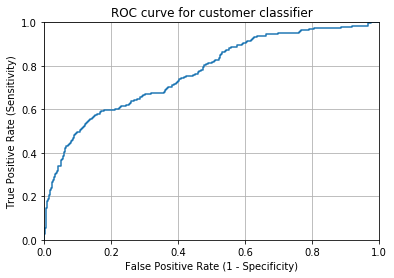

In [156]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test['target'], y_pred_prob_test)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for customer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


print(metrics.roc_auc_score(y_test['target'], y_pred_prob_test))



# KS statistics on test data

In [157]:
X_test_Score=logreg.predict_proba(x_test)
X_test_Score=pd.DataFrame(X_test_Score)
X_test_Score.columns = ['pred0', 'pred1']

In [158]:
X_test_Score.head(2)

,pred0,pred1
0,0.994799,0.005201
1,0.896913,0.103087


In [159]:
X_test_Score1 = pd.concat([x_test.reset_index(drop=True),
                           X_test_Score,pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

print (x_test.shape)
print (y_test.shape)
print (X_test_Score.shape)
print (X_test_Score1.shape)

(1861, 7)
(1861, 1)
(1861, 2)
(1861, 10)


In [160]:
X_test_Score1.head(2)

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,pred0,pred1,target
0,623,2,284.5,0.0,0.0,0.0,0.0,0.994799,0.005201,0
1,108,1,217.0,1.0,1.0,217.0,217.0,0.896913,0.103087,0


In [161]:
X_test_Score1['decile'] = pd.qcut(X_test_Score1.pred1, 10, labels=list(range(10,0,-1)))
X_test_Score1.head(10)

,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,pred0,pred1,target,decile
0,623,2,284.50,0.0,0.0,0.00,0.00,0.994799,0.005201,0,10
1,108,1,217.00,1.0,1.0,217.00,217.00,0.896913,0.103087,0,4
2,564,3,384.25,0.0,0.0,0.00,0.00,0.991960,0.008040,0,9
3,243,1,217.00,1.0,1.0,0.00,217.00,0.948913,0.051087,0,7
4,548,3,541.75,0.0,3.0,0.00,541.75,0.993628,0.006372,0,10
5,212,5,653.75,5.0,5.0,0.00,653.75,0.910023,0.089977,1,4
6,464,2,379.50,0.0,2.0,0.00,379.50,0.988858,0.011142,0,9
7,140,5,1416.25,5.0,5.0,1416.25,1416.25,0.877141,0.122859,0,3
8,109,6,962.25,6.0,6.0,629.00,962.25,0.841612,0.158388,0,2
9,172,1,273.25,1.0,1.0,273.25,273.25,0.926928,0.073072,0,5


In [162]:
grouped = X_test_Score1.groupby('decile', as_index = False)

In [163]:
import numpy as np
grouped.agg({'pred1' : [np.min, np.max]})

decile     pred1          
              amin      amax
0     10  0.000126  0.007288
1      9  0.007303  0.011361
2      8  0.011430  0.033161
3      7  0.033184  0.054107
4      6  0.054344  0.070323
5      5  0.070365  0.088654
6      4  0.089240  0.115241
7      3  0.115333  0.152645
8      2  0.152892  0.203940
9      1  0.204167  0.997620

In [164]:
agg1 = grouped.min().pred1
agg1.rename("min_score", inplace=True)
agg2 = grouped.max().pred1
agg2.rename("max_score", inplace=True)
agg3 = grouped.count().pred1
agg3.rename("total", inplace=True)


agg4 = grouped.sum().target
agg4.rename("event", inplace=True)


agg5=grouped.min().decile
agg5.rename("decile", inplace=True)

0    10
1     9
2     8
3     7
4     6
5     5
6     4
7     3
8     2
9     1
Name: decile, dtype: category
Categories (10, int64): [10 < 9 < 8 < 7 ... 4 < 3 < 2 < 1]

In [165]:
ks=pd.concat([agg1,agg2,agg3,agg4,agg5], axis=1)
ks["non_event"]=ks["total"] - ks["event"]
ks.head(10)

,min_score,max_score,total,event,decile,non_event
0,0.000126,0.007288,187,4,10,183
1,0.007303,0.011361,186,3,9,183
2,0.011430,0.033161,186,4,8,182
3,0.033184,0.054107,186,11,7,175
4,0.054344,0.070323,186,22,6,164
5,0.070365,0.088654,186,18,5,168
6,0.089240,0.115241,186,10,4,176
7,0.115333,0.152645,186,12,3,174
8,0.152892,0.203940,186,32,2,154
9,0.204167,0.997620,186,82,1,104


In [166]:
agg5 =ks.sort_values(by='decile',ascending=False)
agg5

,min_score,max_score,total,event,decile,non_event
9,0.204167,0.997620,186,82,1,104
8,0.152892,0.203940,186,32,2,154
7,0.115333,0.152645,186,12,3,174
6,0.089240,0.115241,186,10,4,176
5,0.070365,0.088654,186,18,5,168
4,0.054344,0.070323,186,22,6,164
3,0.033184,0.054107,186,11,7,175
2,0.011430,0.033161,186,4,8,182
1,0.007303,0.011361,186,3,9,183
0,0.000126,0.007288,187,4,10,183


In [167]:
agg5['cum_sum_event']=agg5.event.cumsum()
agg5['cum_sum_non_event']=agg5.non_event.cumsum()
agg5['event_rate'] = agg5.cum_sum_event / agg5.event.sum()
agg5['non_event_rate'] = agg5.cum_sum_non_event / agg5.non_event.sum()
agg5

,min_score,max_score,total,event,decile,non_event,cum_sum_event,cum_sum_non_event,event_rate,non_event_rate
9,0.204167,0.997620,186,82,1,104,82,104,0.414141,0.062538
8,0.152892,0.203940,186,32,2,154,114,258,0.575758,0.155141
7,0.115333,0.152645,186,12,3,174,126,432,0.636364,0.259771
6,0.089240,0.115241,186,10,4,176,136,608,0.686869,0.365604
5,0.070365,0.088654,186,18,5,168,154,776,0.777778,0.466627
4,0.054344,0.070323,186,22,6,164,176,940,0.888889,0.565244
3,0.033184,0.054107,186,11,7,175,187,1115,0.944444,0.670475
2,0.011430,0.033161,186,4,8,182,191,1297,0.964646,0.779916
1,0.007303,0.011361,186,3,9,183,194,1480,0.979798,0.889958
0,0.000126,0.007288,187,4,10,183,198,1663,1.000000,1.000000


In [168]:
# agg5['ks'] = np.round(((agg5.non_event / agg5.non_event.sum()).cumsum() - (agg5.event / agg5.event.sum()).cumsum()), 4) * 100
agg5['ks']=agg5["event_rate"]- agg5["non_event_rate"]
agg5

,min_score,max_score,total,event,decile,non_event,cum_sum_event,cum_sum_non_event,event_rate,non_event_rate,ks
9,0.204167,0.997620,186,82,1,104,82,104,0.414141,0.062538,0.351604
8,0.152892,0.203940,186,32,2,154,114,258,0.575758,0.155141,0.420616
7,0.115333,0.152645,186,12,3,174,126,432,0.636364,0.259771,0.376592
6,0.089240,0.115241,186,10,4,176,136,608,0.686869,0.365604,0.321264
5,0.070365,0.088654,186,18,5,168,154,776,0.777778,0.466627,0.311151
4,0.054344,0.070323,186,22,6,164,176,940,0.888889,0.565244,0.323645
3,0.033184,0.054107,186,11,7,175,187,1115,0.944444,0.670475,0.273969
2,0.011430,0.033161,186,4,8,182,191,1297,0.964646,0.779916,0.184731
1,0.007303,0.011361,186,3,9,183,194,1480,0.979798,0.889958,0.089840
0,0.000126,0.007288,187,4,10,183,198,1663,1.000000,1.000000,0.000000


In [169]:
flag = lambda x: '<----' if x == agg5.ks.max() else ''

In [170]:
agg5['max_ks'] = agg5.ks.apply(flag)
agg5

,min_score,max_score,total,event,decile,non_event,cum_sum_event,cum_sum_non_event,event_rate,non_event_rate,ks,max_ks
9,0.204167,0.997620,186,82,1,104,82,104,0.414141,0.062538,0.351604,
8,0.152892,0.203940,186,32,2,154,114,258,0.575758,0.155141,0.420616,<----
7,0.115333,0.152645,186,12,3,174,126,432,0.636364,0.259771,0.376592,
6,0.089240,0.115241,186,10,4,176,136,608,0.686869,0.365604,0.321264,
5,0.070365,0.088654,186,18,5,168,154,776,0.777778,0.466627,0.311151,
4,0.054344,0.070323,186,22,6,164,176,940,0.888889,0.565244,0.323645,
3,0.033184,0.054107,186,11,7,175,187,1115,0.944444,0.670475,0.273969,
2,0.011430,0.033161,186,4,8,182,191,1297,0.964646,0.779916,0.184731,
1,0.007303,0.011361,186,3,9,183,194,1480,0.979798,0.889958,0.089840,
0,0.000126,0.007288,187,4,10,183,198,1663,1.000000,1.000000,0.000000,


# confusion matrix on test data set with cut value btw 0.15 to 0.20

In [171]:
#Test Data
x_pred=result.predict(x_test)
pre=pd.DataFrame(x_pred, columns=["Prob"])
pred=pd.concat([y_test,x_test,pre], axis=1)
import numpy as np
pred["pred_outcome"]=np.where(pred.Prob >= 0.17,1,0)
pred.head()

,target,recency,frequency,monetary,1year,1.5year,6monthscost,1.5yearcost,Prob,pred_outcome
CustomerID,,,,,,,,,,
1205,0,623,2,284.50,0.0,0.0,0.0,0.00,0.000414,0
7612,0,108,1,217.00,1.0,1.0,217.0,217.00,0.195544,1
2073,0,564,3,384.25,0.0,0.0,0.0,0.00,0.000999,0
10687,0,243,1,217.00,1.0,1.0,0.0,217.00,0.049463,0
2340,0,548,3,541.75,0.0,3.0,0.0,541.75,0.000833,0


In [172]:
pd.crosstab(pred.target, pred.pred_outcome)

pred_outcome,0,1
target,,
0,1271,392
1,84,114


In [173]:
#sensitivity 
114/(114+84)

0.5757575757575758

In [174]:
#sepcificty
1271/(1271+392)

0.7642814191220686

In [175]:
#accuracy - test
(1271+114)/(1271+114+392+84)

0.7442235357334767